In [3]:
import pandas as pd

### Reading the dataset 

In [4]:
df = pd.read_csv('ai_tweet.csv' , usecols = ['date','username','location','tweets'])

In [3]:
df

,date,username,location,tweets
0,2023-04-14 12:43:13+00:00,lapajapa,Scandinavia,#sunset #cityskyline #beautiful #artificialint...
1,2023-04-14 12:41:45+00:00,Ampcus_mktg,"Chantilly, VA",Behind every generative #AI masterpiece is a m...
2,2023-04-14 12:40:51+00:00,CHINMAYBHALER19,भारत,The Internet is flooded with artworks created ...
3,2023-04-14 12:40:16+00:00,beatner_dj,NaN,"LISTEN ON FRIDAYS TO EPIC PROJECT ""ARTIFICIAL ..."
4,2023-04-14 12:40:09+00:00,nicolascorizzo,"Buenos Aires, Argentina",From Clothes to Spaceships: @Amazon 's Bedrock...
...,...,...,...,...
4997,2023-04-12 18:38:21+00:00,BrandBillboard,"Los Angeles, CA","Hey @GavinNewsom, Check out https://t.co/BLsMy..."
4998,2023-04-12 18:34:51+00:00,Capricorn_Game,NaN,The NYPD has announced the return of their uti...
4999,2023-04-12 18:34:07+00:00,nrchaitu,NaN,"Earn Money Online Using CHAT GPT, Earn 200$ pe..."
5000,2023-04-12 18:34:05+00:00,HadriDerar,"Casablanca, Grand Casablanca",#اثرياء #ضرار_الحضري #الذكاءالاصطناعي #الذكاء_...


In [4]:
df.isnull().sum()     ##checking for the null values

date           0
username       0
location    1448
tweets         0
dtype: int64

In [5]:
df['location'] = df['location'].fillna('missing')    ##filling the nan values with missing

In [6]:
df['username']=df['username'].apply(lambda x : x.lower())
df['location']=df['location'].apply(lambda x : x.lower())
df['tweets']=df['tweets'].apply(lambda x : x.lower())

**Expand the Contractions.**

We use the contractions package to expand the contraction in English such as we'll -> we will or we shouldn't've -> we should not have.

In [7]:
import contractions

In [8]:
df['tweets'] = df['tweets'].apply(lambda x : contractions.fix(x))

**Noise Removal**

In [9]:
df['tweets'][829] 

'i just published "amazon bedrock ai llm jurrasic-2 in test. is it a serious competitor to chatgpt and google’s bard?" https://t.co/hbshkjpn0p \n#amazon #artificialintelligence #openai #chatgpt #gpt4 #bard #googlebard'

In [9]:
import re
def remove_url(text):
    """
    remove urls from the tweets
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [10]:
df['tweets'] = df['tweets'].apply(lambda x : remove_url(x))

In [11]:
df['tweets'][829]    ##urls are removed from the dataset

'i just published "amazon bedrock ai llm jurrasic-2 in test. is it a serious competitor to chatgpt and google’s bard?"  \n#amazon #artificialintelligence #openai #chatgpt #gpt4 #bard #googlebard'

**Removing the html tags**

In [12]:
def remove_html(text):
    """
    remove html tag from the tweets
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [13]:
df['tweets'] = df['tweets'].apply(lambda x : remove_html(x))

**Non- ASCI characters**

In [14]:
def remove_non_asci(text):
    """
    remove non asci chracters from the tweets
    """
    return re.sub(r'[^\x00-\x7f]',r'', text)

In [16]:
df['tweets'][329] 

'how to use #chatgpt for #ecommerce ?\n10 ingenious ideas for unstoppable growth 🚀\n\n#openai #artificialintelligence #business @nichepursuits\n\n '

In [15]:
df['tweets']=df['tweets'].apply(lambda x : remove_non_asci(x))

In [18]:
df['tweets'][29]

'reply to us with your answer. register now for free access to o-mail, o-net, and o-trim!\n\nregister here: \n\n#onpassive #artificialintelligence #ai #technology #branding #marketing #digitalmarketing #aimarketing #business #solutions #businesssolutions '

**Remove special characters**

In [16]:
def remove_special_characters(text):
    """
        Remove special special characters, including symbols, emojis, and other graphic characters
    """
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [17]:
df['tweets'] = df['tweets'].apply(lambda x : remove_special_characters(x))

**Remove punctuations**

In [18]:
def remove_pun(text):
    """
     Remove the punctuation
    """
    return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', " ", text)

In [22]:
df["tweets"][433]

'the world has changed after november 2022, ai is going to teratransform everything it will touch on its way.\nchatgpt||ai||artificialintelligence||generative ai\n#viral #video #immigration #reels #instagram #instagramreels #generativeai #ai #tiktok #viral #viraltiktok #croatia '

In [19]:
df['tweets'] = df['tweets'].apply(lambda x : remove_pun(x))

In [24]:
df["tweets"][433]

'the world has changed after november 2022  ai is going to teratransform everything it will touch on its way \nchatgpt ai artificialintelligence generative ai\n viral  video  immigration  reels  instagram  instagramreels  generativeai  ai  tiktok  viral  viraltiktok  croatia '

**Foramting date column to date time**

In [20]:
df['date'] = pd.to_datetime(df['date'])

In [21]:
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['min'] = df['date'].dt.minute
df['month'] = df['date'].dt.month_name()

In [22]:
df.head()

,date,username,location,tweets,day,hour,min,month
0,2023-04-14 12:43:13+00:00,lapajapa,scandinavia,sunset cityskyline beautiful artificialint...,14,12,43,April
1,2023-04-14 12:41:45+00:00,ampcus_mktg,"chantilly, va",behind every generative ai masterpiece is a m...,14,12,41,April
2,2023-04-14 12:40:51+00:00,chinmaybhaler19,भारत,the internet is flooded with artworks created ...,14,12,40,April
3,2023-04-14 12:40:16+00:00,beatner_dj,missing,listen on fridays to epic project artificial ...,14,12,40,April
4,2023-04-14 12:40:09+00:00,nicolascorizzo,"buenos aires, argentina",from clothes to spaceships amazon s bedrock...,14,12,40,April


In [28]:
text=[i for i in df.columns if df[i].dtypes == 'O']

In [23]:
data = df.copy()

In [30]:
from urlextract import URLExtract

In [31]:
extractor = URLExtract()
links = []
for loc in df['location']:
    url=extractor.find_urls(loc)
    if len(url) != 0:
        links.extend(url)
        

In [32]:
links

['t.me/futuroprossimo',
 'domainsell.net',
 'domainsell.net',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'domainsell.net',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'youtube.com/@rohanpaul-ai',
 'domainsell.net',
 '127.0.0.1',
 'https://spxbot.com',
 'domainsell.net',
 'domainsell.net',
 'domainsell.ne

In [33]:
link_in_tweets = []
for loc in df['tweets']:
    url=extractor.find_urls(loc)
    if len(url) != 0:
        link_in_tweets.extend(url)


In [34]:
 x=df['location'].value_counts().head(5)

In [35]:
import matplotlib.pyplot as plt

In [36]:
place = x.index
count = x.values

<BarContainer object of 5 artists>

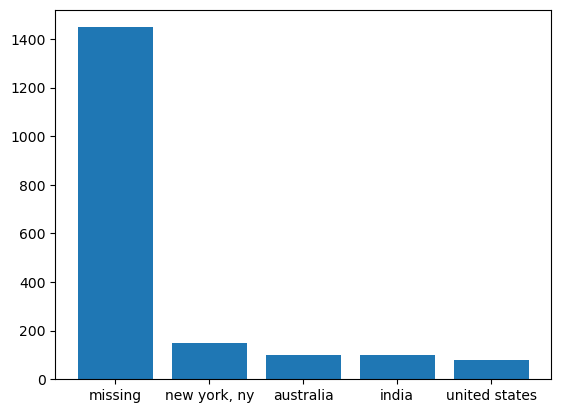

In [37]:
plt.bar(place ,count)

In [38]:
y = round((df['location'].value_counts()/df.shape[0]) *100,2).reset_index().rename(columns={'index':'place','location':'percent'})

In [39]:
y[:10:]

,place,percent
0,missing,28.95
1,"new york, ny",3.00
2,australia,2.00
3,india,1.96
4,united states,1.60
5,uk,1.42
6,the netherlands,1.32
7,marlow,1.00
8,worldwide,0.96
9,the internet,0.90


In [40]:
%matplotlib inline
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10 ,background_color='white')

In [41]:
fig=wc.generate(df['location'].str.cat(sep=' '))

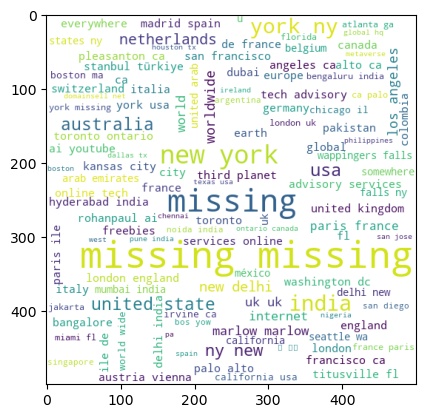

In [42]:
plt.imshow(fig)

In [77]:
f = open('stopwords.txt','r')
stop_words = f.read()
print(stop_words)

a
about
above
across
after
again
against
all
almost
alone
along
already
also
although
always
among
an
and
another
any
anybody
anyone
anything
anywhere
are
area
areas
around
as
ask
asked
asking
asks
at
away
b
back
backed
backing
backs
be
became
because
become
becomes
been
before
began
behind
being
beings
best
better
between
big
both
but
by
c
came
can
cannot
case
cases
certain
certainly
clear
clearly
come
could
d
did
differ
different
differently
do
does
done
down
down
downed
downing
downs
during
e
each
early
either
end
ended
ending
ends
enough
even
evenly
ever
every
everybody
everyone
everything
everywhere
f
face
faces
fact
facts
far
felt
few
find
finds
first
for
four
from
full
fully
further
furthered
furthering
furthers
g
gave
general
generally
get
gets
give
given
gives
go
going
good
goods
got
great
greater
greatest
group
grouped
grouping
groups
h
had
has
have
having
he
her
here
herself
high
high
high
higher
highest
him
himself
his
how
however
i
if
important
in
interest
interested
inter

In [78]:
stop_words = [word for word in stop_words.split('\n')]
stop_words

['a',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'end',
 'ended',
 'ending',
 'ends',
 'enough',
 'even',
 'evenly',
 'ever',
 'every',
 'everybody',
 'everyone',
 'everything',

In [68]:
removed = []
for message in df['tweets']:
    for word in message.lower().split():
        if word not in stop_words:
            removed.append(word)

In [69]:
removed

['sunset',
 'cityskyline',
 'beautiful',
 'artificialintelligence',
 'aigenerated',
 'photography',
 'digitalart',
 'generative',
 'ai',
 'masterpiece',
 'machine',
 'learning',
 'algorithm',
 'learning',
 'vast',
 'amounts',
 'data',
 'machinelearning',
 'models',
 'generate',
 'content',
 'ideas',
 'generative',
 'ai',
 'ampcus',
 'mktg',
 '1',
 '703',
 '637',
 '7299',
 'info',
 'ampcus',
 'com',
 'artificialintelligence',
 'internet',
 'flooded',
 'artworks',
 'created',
 'bygenerative',
 'ai',
 'artwork',
 'generated',
 'actually',
 'owns',
 'yourself',
 'ai',
 'existing',
 'copyright',
 'holder',
 'artwork',
 'based',
 'artificialintelligence',
 'generativeai',
 'listen',
 'fridays',
 'epic',
 'project',
 'artificial',
 'intelligence',
 'beatner',
 'kolik',
 'online',
 'dance',
 'radiostation',
 'beatner',
 'fm',
 'listen',
 'beatnerfm',
 'artificialintelligence',
 'radio',
 'danceradio',
 'onlineradio',
 'onair',
 'nowonair',
 'nowplaying',
 'radioshow',
 'edm',
 'techno',
 'clot

In [70]:
from collections import Counter
Counter(removed).most_common(20)

[('artificialintelligence', 5023),
 ('ai', 4886),
 ('machinelearning', 1454),
 ('chatgpt', 997),
 ('art', 747),
 ('datascience', 735),
 ('aiartcommunity', 609),
 ('technology', 586),
 ('artificial', 580),
 ('bigdata', 574),
 ('intelligence', 567),
 ('aiart', 510),
 ('tech', 476),
 ('ml', 468),
 ('data', 446),
 ('deeplearning', 406),
 ('midjourney', 403),
 ('digitalart', 379),
 ('neuralnetworks', 334),
 ('robotics', 305)]

In [79]:
common_words_df = pd.DataFrame(Counter(removed).most_common(20),columns=['words' , 'number of words'])

In [81]:
common_words_df.columns

Index(['words', 'number of words'], dtype='object')

In [1]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


C:\Users\HP\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [28]:
ai_data = df['tweets'].values

In [32]:
from tqdm.notebook import tqdm

In [33]:
sentiment_analysis_data = []
for i in tqdm(ai_data):
    sent=sentiment_pipeline(i)
    sentiment_analysis_data.append(sent)

  0%|          | 0/5002 [00:00<?, ?it/s]

In [54]:
sentiment_analysis_data

[[{'label': 'POSITIVE', 'score': 0.9992519021034241}],
 [{'label': 'POSITIVE', 'score': 0.9728628396987915}],
 [{'label': 'NEGATIVE', 'score': 0.9989883303642273}],
 [{'label': 'NEGATIVE', 'score': 0.984650731086731}],
 [{'label': 'NEGATIVE', 'score': 0.998115062713623}],
 [{'label': 'NEGATIVE', 'score': 0.9040141701698303}],
 [{'label': 'NEGATIVE', 'score': 0.99854975938797}],
 [{'label': 'NEGATIVE', 'score': 0.9598569869995117}],
 [{'label': 'POSITIVE', 'score': 0.9703305959701538}],
 [{'label': 'NEGATIVE', 'score': 0.9873881936073303}],
 [{'label': 'POSITIVE', 'score': 0.9942202568054199}],
 [{'label': 'NEGATIVE', 'score': 0.9636422395706177}],
 [{'label': 'NEGATIVE', 'score': 0.9724469184875488}],
 [{'label': 'NEGATIVE', 'score': 0.985474705696106}],
 [{'label': 'NEGATIVE', 'score': 0.9875149726867676}],
 [{'label': 'POSITIVE', 'score': 0.9694990515708923}],
 [{'label': 'POSITIVE', 'score': 0.9988686442375183}],
 [{'label': 'POSITIVE', 'score': 0.9392861723899841}],
 [{'label': 'NE

In [48]:
import itertools

In [59]:
sentiment_df=pd.DataFrame(list(itertools.chain(*sentiment_analysis_data)))

In [69]:
final_df=pd.concat([df,sentiment_df],axis=1)

In [74]:
final_df

,date,username,location,tweets,day,hour,min,month,label,score
0,2023-04-14 12:43:13+00:00,lapajapa,scandinavia,sunset cityskyline beautiful artificialint...,14,12,43,April,POSITIVE,0.999252
1,2023-04-14 12:41:45+00:00,ampcus_mktg,"chantilly, va",behind every generative ai masterpiece is a m...,14,12,41,April,POSITIVE,0.972863
2,2023-04-14 12:40:51+00:00,chinmaybhaler19,भारत,the internet is flooded with artworks created ...,14,12,40,April,NEGATIVE,0.998988
3,2023-04-14 12:40:16+00:00,beatner_dj,missing,listen on fridays to epic project artificial ...,14,12,40,April,NEGATIVE,0.984651
4,2023-04-14 12:40:09+00:00,nicolascorizzo,"buenos aires, argentina",from clothes to spaceships amazon s bedrock...,14,12,40,April,NEGATIVE,0.998115
...,...,...,...,...,...,...,...,...,...,...
4997,2023-04-12 18:38:21+00:00,brandbillboard,"los angeles, ca",hey gavinnewsom check out domain for sale ...,12,18,38,April,NEGATIVE,0.995191
4998,2023-04-12 18:34:51+00:00,capricorn_game,missing,the nypd has announced the return of their uti...,12,18,34,April,NEGATIVE,0.989458
4999,2023-04-12 18:34:07+00:00,nrchaitu,missing,earn money online using chat gpt earn 200 pe...,12,18,34,April,NEGATIVE,0.994887
5000,2023-04-12 18:34:05+00:00,hadriderar,"casablanca, grand casablanca",ai artificialintelligence,12,18,34,April,NEGATIVE,0.996296


In [89]:
final_df['label'].value_counts().values[0]

3706